> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Research Questions:

1.What is the impact of age and gender on showing up for the appointment?
2.What is the impact of scholarship on showing up for the appointment?
3.What is the impact of waiting period on the patient to show-up for the appointment?
4.What are the top nine neighbourhoods based on number of no-show appointments?
5.What is the number of missed appointments for the 5 special conditions?

In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Upgrading pandas
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
#Loading the dataset(No-show appointments)
df = pd.read_csv('noshowappointments.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Descriptive Statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Finding out the sum of missing values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#Finding the data types of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
#Number of rows and columns
df.shape

(110527, 14)

In [10]:
#Finding the number of unique values 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#Descriptive statistics of Age
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


### Data Cleaning


In [12]:
#Renaming the elements with spelling errors
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [13]:
# convert string to datetime and keep only the date
columns = ['ScheduledDay', 'AppointmentDay']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)

print(df.dtypes)
df.head(3)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                   object
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
# finding negative values in age
negative = df.query('Age < 0')
negative

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# dropping the row with the negative age
df.drop(negative.index, inplace=True)
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [16]:
 # checking counts in no_show column
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [17]:
# Assigning the values (Yes=1, No=0) 
df.No_show = np.where(df.No_show == "Yes", 1, 0)
df.No_show.value_counts()

0    88207
1    22319
Name: No_show, dtype: int64

In [18]:
# checking the values in the handicap column
df.Handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [19]:
# Changing the value to 1 if the value is >1
df['Handicap'] = np.where(df['Handicap'] > 1, 1, df['Handicap'])
df.Handicap.value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

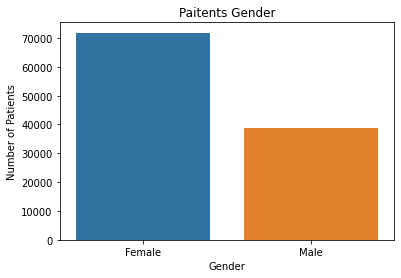

In [20]:
# plotting a bar chart with patient gender distribution
sns.countplot(data = df, x = 'Gender')
plt.title('Paitents Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

There were more number of females when comapred to males. 

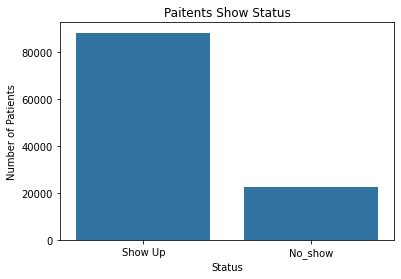

In [21]:
# plotting a bar chart with Number of patients and the patients show status

base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'No_show', color = base_color)
plt.title('Paitents Show Status')
plt.xticks([0, 1], ['Show Up', 'No_show'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

Most of the patients showed up for their scheduled appointment. 

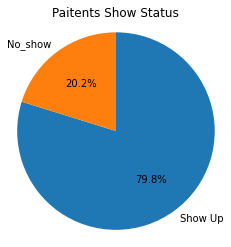

In [22]:
# plotting a pie chart with the patients show status
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No_show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

Around 80% of the patients showed up for their scheduled appointment. 

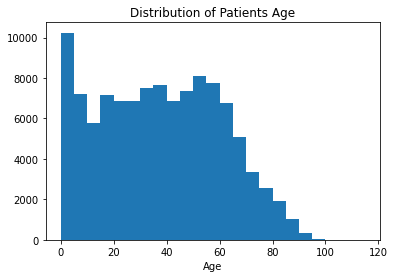

In [23]:
# plotting a histogram with patients Age distribution
bin_edges = np.arange(0, df['Age'].max()+5, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges)
plt.xlabel('Age')
plt.title('Distribution of Patients Age');

Most of the patients were young.

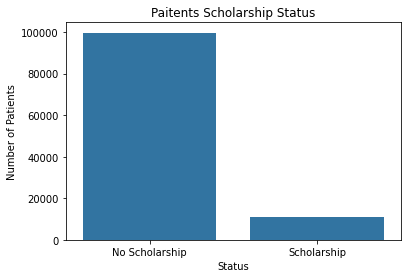

In [24]:
# plotting a bar chart with the patients scholarship status
sns.countplot(data = df, x = 'Scholarship', color = base_color)
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

Most of the patients have no scholarship. 

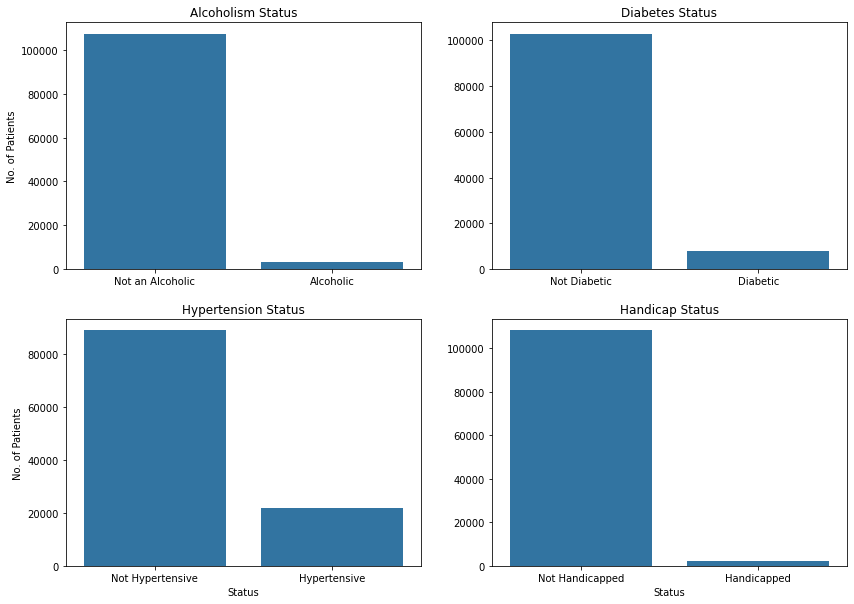

In [25]:
#Plotting a barchart considetring the 4 elements (Alcoholism, Hypertension,Diabetes and Handicap status) in the dataset
plt.figure(figsize = [14, 10]) # larger figure size for subplots

# alcoholism 
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
sns.countplot(data = df, x = 'Alcoholism', color = base_color)
plt.title('Alcoholism Status')
plt.xticks([0, 1], ['Not an Alcoholic', 'Alcoholic'])
plt.xlabel('')
plt.ylabel('No. of Patients');

# hypertension 
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
sns.countplot(data = df, x = 'Hypertension', color = base_color)
plt.title('Hypertension Status')
plt.xticks([0, 1], ['Not Hypertensive', 'Hypertensive'])
plt.xlabel('Status')
plt.ylabel('No. of Patients');

# diabetes 
plt.subplot(2, 2, 2) # 2 row, 2 cols, subplot 2
sns.countplot(data = df, x = 'Diabetes', color = base_color)
plt.title('Diabetes Status')
plt.xticks([0, 1], ['Not Diabetic', 'Diabetic'])
plt.xlabel('')
plt.ylabel('');


# handicap
plt.subplot(2, 2, 4) # 2 row, 2 cols, subplot 4
sns.countplot(data = df, x = 'Handicap', color = base_color)
plt.title('Handicap Status')
plt.xticks([0, 1], ['Not Handicapped', 'Handicapped'])
plt.xlabel('Status')
plt.ylabel('');

Most of the patients were not handicapped, non alcoholic,non-diabetic and non-hypertensive. Hypertensive cases were more when compared to the remaining 3 categories. 

In [26]:
# calculating days between the appointment scheduled_day and day of the appointment
days_between = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
# inserting a new column (days_between) before column 3
df.insert(3, 'days_between', days_between)
df.head()

,PatientId,AppointmentID,Gender,days_between,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [27]:
#  min, 25%, 50%, 75%, max days
df['days_between'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_between, dtype: float64

In [28]:
#cutting the data into groups based on waiting period
bin_edges = [-1, 0, 4, 15, 179]
# labels for 4 groups
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']
waiting_period = pd.cut(df['days_between'], bin_edges, labels=bin_names)
# inserting a new column waiting_period
df.insert(4, 'waiting_period', waiting_period)
df.head()

,PatientId,AppointmentID,Gender,days_between,waiting_period,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,0,0 days,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,0,0 days,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,0,0 days,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,0,0 days,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,0,0 days,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [29]:
# finding which day of the week was the appointment 
week_day = df.AppointmentDay.dt.weekday 
# inserting a new column week_day
df.insert(3, 'week_day', week_day)
df.head()

,PatientId,AppointmentID,Gender,week_day,days_between,waiting_period,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,4,0,0 days,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,4,0,0 days,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,4,0,0 days,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,4,0,0 days,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,4,0,0 days,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [30]:
#cutting the data into groups based on age
bin_edges = [-1, 18, 37, 55, 115]
# labels for the 4 groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], bin_edges, labels=bin_names)
# insert a new column age_group
df.insert(7, 'age_group', age_group)
df.head()

,PatientId,AppointmentID,Gender,week_day,days_between,waiting_period,ScheduledDay,age_group,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,4,0,0 days,2016-04-29,56 and above,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,4,0,0 days,2016-04-29,56 and above,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,4,0,0 days,2016-04-29,56 and above,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,4,0,0 days,2016-04-29,0-18,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,4,0,0 days,2016-04-29,56 and above,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [31]:
df.drop(['ScheduledDay', 'AppointmentDay', 'days_between', 'Age'], axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,week_day,waiting_period,age_group,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,4,0 days,56 and above,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,4,0 days,56 and above,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,4,0 days,56 and above,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,4,0 days,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,4,0 days,56 and above,JARDIM DA PENHA,0,1,1,0,0,0,0


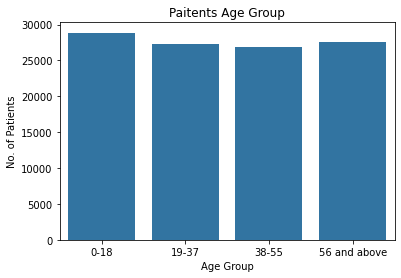

In [32]:
# plotting a bar chart
sns.countplot(data = df, x = 'age_group', color = base_color)
plt.title('Paitents Age Group')
plt.xlabel('Age Group')
plt.ylabel('No. of Patients');

The patients were more in number in the 0-18 age group followed by 56 and above age group. 

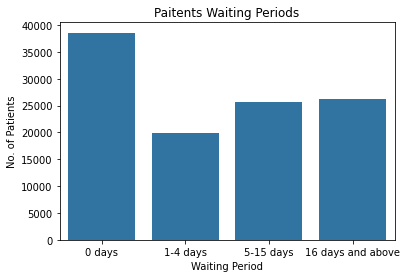

In [33]:
# plotting a bar chart
sns.countplot(data = df, x = 'waiting_period', color = base_color)
plt.title('Paitents Waiting Periods')
plt.xlabel('Waiting Period')
plt.ylabel('No. of Patients');

Most of the patients have scheduled the appointments on the same day with no waiting period. 

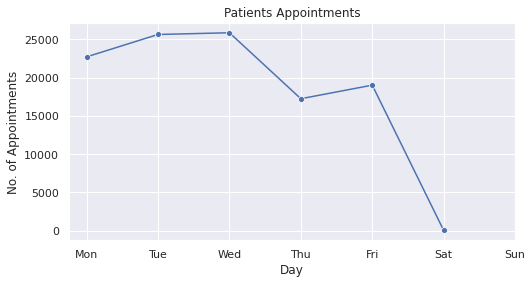

In [34]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

weekday_counts = df.week_day.value_counts()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = weekday_counts.index,  y = weekday_counts, marker='o')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.title('Patients Appointments')
plt.xlabel('Day')
plt.ylabel('No. of Appointments');

### Research Question 1: What is the impact of age and gender on showing up for the appointment?



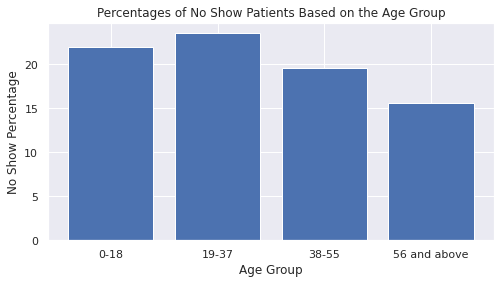

In [35]:
# No show patients based on age group (Percentage)
No_show_perc_a = df.groupby('age_group').No_show.mean() * 100

# plotting a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = No_show_perc_a.index, height = No_show_perc_a)
plt.title('Percentages of No Show Patients Based on the Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');


Patient age group help us to predict if he/she will attend the scheduled appointment. The patients in the age group 19-37 were more likely to miss the appointments followed by the patients in 0-18 age group. The patients in the age group 56 and above have promptly attended their appointments when compared to othe other age groups.

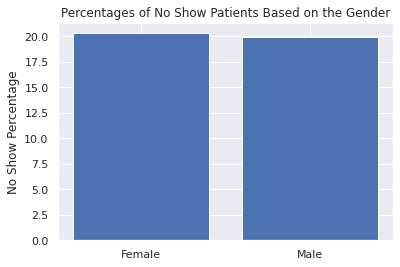

In [36]:
#No show patients based on gender (Percentage)
No_show_perc_g = df.groupby('Gender').No_show.mean() * 100

# plotting a bar chart
plt.bar(x = No_show_perc_g.index, height = No_show_perc_g)
plt.title('Percentages of No Show Patients Based on the Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

There is only a slight difference in the percentage of no show patients based on gender. Males have shown up more for the appointment when compared to females. But we cannot clearly predict the show status based on the gender.

In [37]:
def chi_test(colA, colB):
    CT = pd.crosstab(colA, colB)
    display(CT)  
    chi2, p_value, dof, _ = stats.chi2_contingency(CT, False)
    print('The chi-square test has given a value of {:.2f} which was done with {} degree(s) of freedom.'.format(chi2, dof))
    print('The p-value was found to be {:.3f}'.format(p_value))

In [38]:
chi_test(df.No_show, df.age_group)

age_group,0-18,19-37,38-55,56 and above
No_show,,,,
0,22519,20836,21651,23201
1,6347,6414,5255,4303


The chi-square test has given a value of 607.18 which was done with 3 degree(s) of freedom.
The p-value was found to be 0.000


From the Chi-square test we can observe that the difference is statistically significant.

In [39]:
chi_test(df.No_show, df.Gender)

Gender,F,M
No_show,,
0,57245,30962
1,14594,7725


The chi-square test has given a value of 1.88 which was done with 1 degree(s) of freedom.
The p-value was found to be 0.171


From the Chi-square test we can observe that the difference is statistically significant.

### Research Question 2: What is the impact of scholarship on showing up for the appointment?

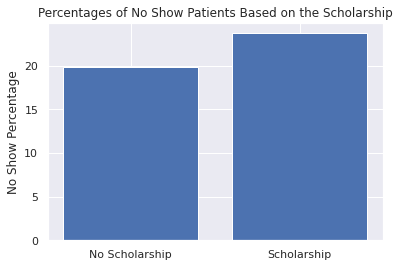

In [42]:
# No show patients based on scholarship (Percentage)
No_show_perc_s = df.groupby('Scholarship').No_show.mean() * 100

# plot a bar chart
plt.bar(x = No_show_perc_s.index, height = No_show_perc_s)
plt.title('Percentages of No Show Patients Based on the Scholarship')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

From the above bar chart, we can observe that there is a notable difference between the paercentage of no show patients based on the scholarship. Patients with scholarship are more likely to miss their appointments when compared to the patients without scholarship. Based on this we can predict the show status of the patients. 

### Research Question 3: What is the impact of waiting period on the patient to show-up for the appointment?

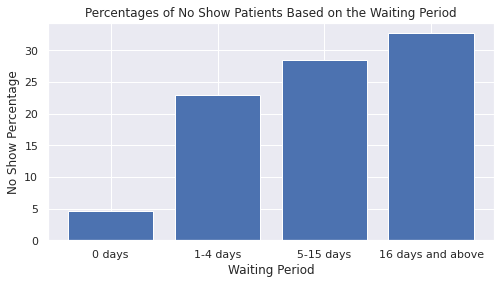

In [43]:
# No show patients based on waiting period (Percentage)
No_show_perc_wp = df.groupby('waiting_period').No_show.mean() * 100

# plotting a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = No_show_perc_wp.index, height = No_show_perc_wp)
plt.title('Percentages of No Show Patients Based on the Waiting Period')
plt.xlabel('Waiting Period')
plt.ylabel('No Show Percentage');

From the above bar chart we can observe that if there is a longer waiting period of 16 days and above, the patients are more likely to not attend the appointment. 

### Research Question 4: What are the top nine neighbourhoods based on number of no-show appointments?

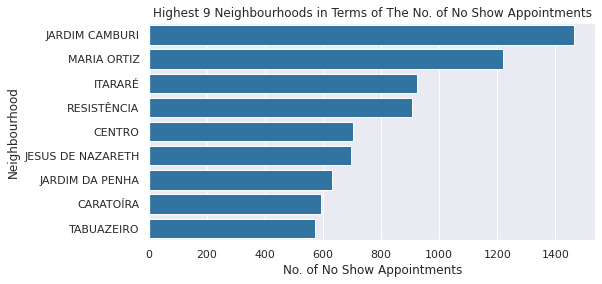

In [44]:
# no-show appointments
df_No_show = df[df.No_show == 1]

# plotting a bar chart
plt.figure(figsize = [8, 4])
cat = df_No_show['Neighbourhood'].value_counts().index[:9]
sns.countplot(data = df_No_show, y = 'Neighbourhood', color = base_color, order = cat)
plt.title('Highest 9 Neighbourhoods in Terms of The No. of No Show Appointments')
plt.xlabel('No. of No Show Appointments')
plt.ylabel('Neighbourhood');

Of all the 9 neighbourhoods, Jardim Camburi has more number of missed appointments followed by Maria ortiz, Itarare and Resistencia. 

### Research Question 5: What is the number of missed appointments for the 5 special conditions?

In [45]:
# Finding number of special conditions for each patient
df['number_of_cond'] = df.Hypertension + df.Diabetes + df.Alcoholism + df.Handicap
# empty dictionary 
cond_dict = {}
# no show patients who suffered from alcoholism 
cond_dict['Alcoholism'] = (df[df.number_of_cond <= 1].groupby('Alcoholism').No_show.mean() * 100)[1]
# no show patients who were handicapped 
cond_dict['Handicapped'] = (df[df.number_of_cond <= 1].groupby('Handicap').No_show.mean() * 100)[1]
# no show patients who suffered from hypertension 
cond_dict['Hypertension'] = (df[df.number_of_cond <= 1].groupby('Hypertension').No_show.mean() * 100)[1]
# no show patients who suffered from diabetes 
cond_dict['Diabetes'] = (df[df.number_of_cond <= 1].groupby('Diabetes').No_show.mean() * 100)[1]
# no show patients with multiple conditions
cond_dict['Multiple Conditions'] = df[df.number_of_cond > 1].No_show.mean() * 100
cond_dict

{'Alcoholism': 21.644120707596255,
 'Handicapped': 19.632414369256473,
 'Hypertension': 17.016760594305786,
 'Diabetes': 20.3579418344519,
 'Multiple Conditions': 17.69815418023887}

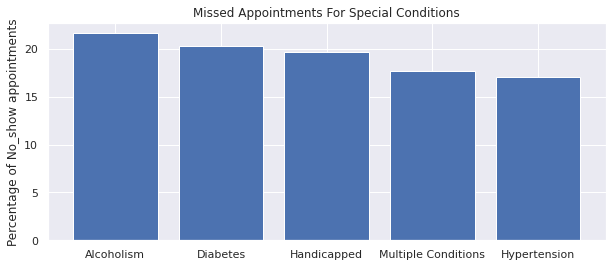

In [46]:
cs = pd.Series(cond_dict)
cs.sort_values(ascending=False, inplace=True)
cs
# plotting a bar chart
plt.figure(figsize = [10, 4])
plt.bar(x = cs.index, height = cs)
plt.title('Missed Appointments For Special Conditions')
plt.ylabel('Percentage of No_show appointments');

Of all the special conditions, the patients who are alcoholics were more likely(21.6%)  to miss their appointments followed by Diabetics (20.35%) and Handicapped(19.63%).

<a id='conclusions'></a>
### Conclusions

The No-show appointment dataset consists of 110,527 appointments totally. After observing the data I found that 20% of the patients havent attended their scheduled appointments.
There were 110527 rows and 14 columns in the dataset.
Females were in large number when compared to males. Younger people were more when compared to the geriatric population.Most of the patients scheduled the appointments for the same day.Most of the people didnot suffer from the special conditions mentioned in the dataset.

From Analysing the data I can conclude that:

1.There is an impact of age on attending for the appointment. Younger people and people at the age of 56 and above were more likely to miss the appointment.  Males are more likely to miss the appointments when compared to females.
2.Patients with scholarship are more likely to not show up for their scheduled appointment when compared to patients with no scholarship.
3.If the waiting period is long, there are chances that the patient may not attend the appointment.
4.The top 9 neighborhoods in terms of no-show appointments include Jardim Camburi,Maria Ortiz,Itarare,Resistencia,Centro,Jesus De Nazareth,Jardim Da Penha,Caratoira and Tabuazeiro.
5.Of all the patients with special conditions, patients who are alcoholics are more likely to miss the appointments followed by Diabetics and Handicapped.


### Limitations

-The appointment time was not mentioned in the dataset.
-The dataset is old which was prepared in 2016.
-The data was collected from a single country.
-The dataset only contains data of 40 days.
-There is no information about the data collection process.
-The dataset didnot contain information about the reason for the patient to visit the hospital.